May 17: Details about coordinates and bathymetry files using the NEMO configuration of the Salish Sea model as an example.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

"NEMO has the file names of the coordinates and bathymetry files hard-coded as coordinates.nc and bathy_meter.nc so the files used for a particular run-set need to be copied or symlinked to those names."

http://salishsea-meopar-docs.readthedocs.io/en/latest/code-notes/salishsea-nemo/nemo-forcing/repo.html#repo-contents

### Bathymetry File

In [10]:
bathy_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/bathy_meter_SalishSea.nc')

In [11]:
bathy_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Salish Sea NEMO Bathymetry
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/tools/src/tip/bathymetry/SalishSeaBathy.ipynb
    references: https://bitbucket.org/salishsea/nemo-forcing/src/tip/grid/bathy_meter_SalishSea.nc
    comment: Based on 1_bathymetry_seagrid_WestCoast.nc file from 2-Oct-2013 WCSD_PREP tarball provided by J-P Paquin.
    history: 
    [2013-10-30 13:18] Created netCDF4 zlib=True dataset.
    [2013-10-30 15:22] Set depths between 0 and 4m to 4m and those >428m to 428m.
    [2013-10-31 17:10] Algorithmic smoothing.
    [2013-11-21 19:53] Reverted to pre-smothing dataset (repo rev 3b301b5b9b6d).
    [2013-11-21 20:14] Updated dataset and variable attributes to CF-1.6 conventions & project standards.
    [2013-11-21 20:47] Removed east end of Jervis Inlet and Toba

In [12]:
bathy_file.dimensions

OrderedDict([('y',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898),
             ('x',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398)])

In [13]:
bathy_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lon(y, x)
                  units: degrees east
                  valid_range: [-126.40029144 -121.31835175]
                  long_name: Longitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float64 nav_lat(y, x)
                  units: degrees north
                  valid_range: [ 46.85966492  51.10480118]
                  long_name: Latitude
              unlimited dimensions: 
              current shape = (898, 398)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
              float64 Bathymetry(y, x)
                  _FillValue: 0.0
                  least_significant_digit: 1
                  units: m
             

### Coordinates File

In [2]:
coord_file = nc.Dataset('/ocean/imachuca/NEMO-forcing/grid/coordinates_seagrid_SalishSea.nc')

In [16]:
coord_file.variables

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lon(y, x)
                  units: degrees_east
                  comment: at t points
              unlimited dimensions: 
              current shape = (898, 398)
              filling off), ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
              float32 nav_lat(y, x)
                  units: degrees_north
                  comment: at t points
              unlimited dimensions: 
              current shape = (898, 398)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
                  units: seconds since 0001-01-01 00:00:00
                  time_origin: 0000-JAN-01 00:00:00
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (1,)
              filling off), ('time_steps', <class 'netCDF4._netCDF4.Variable'>
              int32 time_steps(time)
                  units: seconds 

**glam** - longitude and **gphi** - latitude

In [18]:
all_vars = ['nav_lon','nav_lat']

for var in all_vars:
    print(coord_file.variables[var])

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    units: degrees_east
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    units: degrees_north
    comment: at t points
unlimited dimensions: 
current shape = (898, 398)
filling off



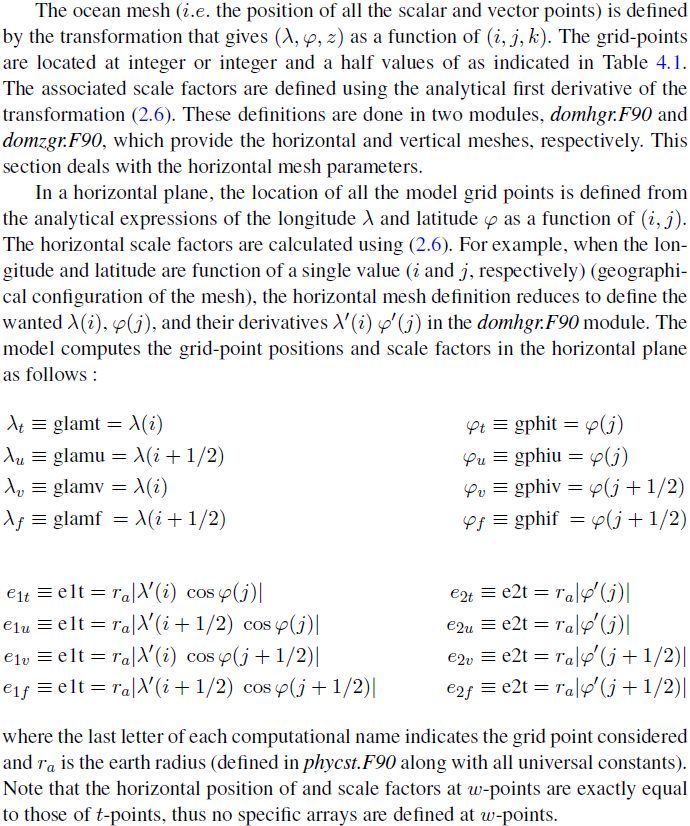

In [23]:
# NEMO Ocean Engine by Gurvan Madec and the NEMO team -- pg.54
Image(filename='../../images/coords1.png')